# Using Time Series to Model Spotify Streaming Data

### [Data_Prep](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Data-Preparation)
### [Plotting TS](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Plotting-Time-Series-Data)
### [Plotting #1 Song Streams](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Plotting-#-of-Streams-for-#1-Song-for-different-Regions)
### [Creating Stationary TS Data](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Creating-Stationary-TimeSeries-Data)
### [Seasonal Decompostion](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Using-Seasonal-Decomposition-to-Increase-Stationarness-of-Data)
##### Refrences
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# function to create bigger fonts
def bigger_fonts(ax):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

# Data Preparation

In [3]:
#Read in spotify data
spotify_df = pd.read_csv('../data/data.csv', infer_datetime_format=True, parse_dates=['Date'])

In [4]:
# create day of week and day column
spotify_df['day_of_week'] = spotify_df['Date'].dt.dayofweek
spotify_df['day'] = spotify_df['day_of_week'].map({0:'Monday',1:'Tuesday',\
                                                     2:'Wednesday',3:'Thursday',\
                                                     4:'Friday',5:'Saturday',6:'Sunday'})
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,day
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ar,6,Sunday
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ar,6,Sunday
2,3,Reggaetón Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ar,6,Sunday
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ar,6,Sunday
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ar,6,Sunday


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017625 entries, 0 to 2017624
Data columns (total 9 columns):
Position       int64
Track Name     object
Artist         object
Streams        int64
URL            object
Date           datetime64[ns]
Region         object
day_of_week    int64
day            object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.5+ MB


In [6]:
spotify_df.describe()

,Position,Streams,day_of_week
count,2.017625e+06,2.017625e+06,2.017625e+06
mean,9.394797e+01,5.208577e+04,2.993814e+00
std,5.735935e+01,2.095484e+05,2.002716e+00
min,1.000000e+00,1.001000e+03,0.000000e+00
25%,4.400000e+01,3.189000e+03,1.000000e+00
50%,9.100000e+01,8.674000e+03,3.000000e+00
75%,1.420000e+02,2.814300e+04,5.000000e+00
max,2.000000e+02,1.138152e+07,6.000000e+00


In [7]:
# create df with songs that were #1 (top of the charts)
top_o_charts = spotify_df[spotify_df['Position'] == 1]
songs_that_topped = set((top_o_charts['Track Name'].tolist()))
print(songs_that_topped)
print(len(songs_that_topped))
region_charts = top_o_charts[['Date','Region','Streams','Artist','Track Name', 'day_of_week','day']].reset_index()
print(len(region_charts))
region_charts.head()

{'Mi Gente', nan, 'There for You', 'Alleen', 'Come Again', 'Salam', 'Fy faen', 'Felices los 4', 'Cono Gelato', 'Without You (feat. Sandro Cavazza)', 'Jag trodde änglarna fanns', 'Amar pelos Dois', 'Una Lady Como Tú', 'Believer', 'Fazer Falta', 'Bad and Boujee (feat. Lil Uzi Vert)', 'Sen Olsan Bari', 'Pizza Kebab', 'Fullir Vasar', 'Symphony (feat. Zara Larsson)', 'HUMBLE.', 'Mauvaise graine', 'Hey Baby', 'Krantenwijk', 'Closer', 'Pettävällä Jäällä - Vain Elämää Kausi 6', 'Time', 'Attention', "Occidentali's Karma - Radio Edit", 'Nostalgia', 'Rahan takii', 'Millionär', 'Such A Boy', 'Reggaetón Lento (Bailemos)', 'Mä hiihdän', 'Glorious (feat. Skylar Grey)', 'Otra Vez (feat. J Balvin)', 'One Dance', 'Feels', 'Senza Pagare VS T-Pain', 'Hula Hula', 'Soy Peor', 'Olha a Explosão', 'Back to You (feat. Bebe Rexha & Digital Farm Animals)', 'Rockabye (feat. Sean Paul & Anne-Marie)', 'Juna', 'Yolla', 'Ahora Dice', 'Volare', 'Alone', 'Antaudun', 'Waiting For', 'Thunder', 'El Farsante', 'Sua Cara (fe

,index,Date,Region,Streams,Artist,Track Name,day_of_week,day
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday


In [8]:
# avg number of streams per day
avg_streams = spotify_df.groupby(['Region','Date'])['Region','Streams'].mean().reset_index()
avg_streams.rename(columns={'Streams':'avg_streams'}, inplace=True)
print(len(avg_streams))
avg_streams.head()

11854


,Region,Date,avg_streams
0,ar,2017-01-01,39444.360
1,ar,2017-01-02,30050.205
2,ar,2017-01-03,29609.535
3,ar,2017-01-04,30097.865
4,ar,2017-01-05,31118.230


In [9]:
# merging avg number of streams per day and top of the charts df
streaming_data = region_charts.merge(avg_streams, on=('Date', 'Region'), how='left')
streaming_data.rename(columns={'Streams':'Streams_#1_song'}, inplace=True)
streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday,39444.360
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday,30050.205
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday,29609.535
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday,30097.865
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday,31118.230


# Plotting Time Series Data

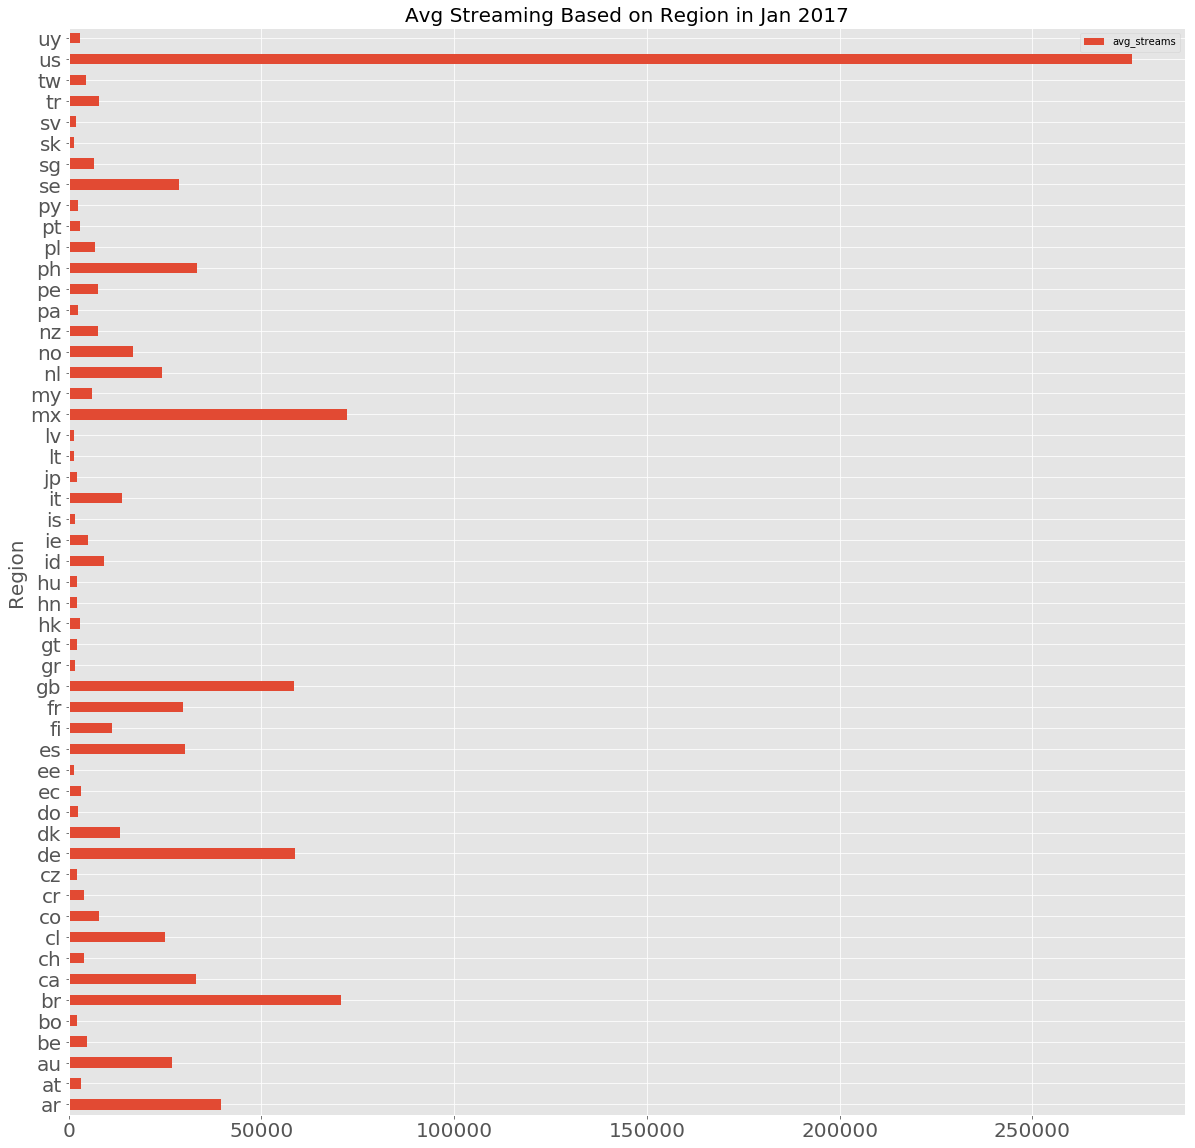

In [10]:
# plotting avg number of streams in january based on region
streaming_data_no_global = streaming_data[streaming_data['Region'] != 'global']
ax = streaming_data_no_global[streaming_data_no_global['Date'] == '2017-01-01'].plot.barh(x='Region', \
                                                                                          y=['avg_streams'],\
                                                                                        figsize=(20,20),\
                                                                                         title = 'Avg Streaming Based on Region in Jan 2017')
bigger_fonts(ax)

In [11]:
# pulling global streaming data
global_streaming_data = streaming_data[streaming_data['Region'] == 'global']
global_streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


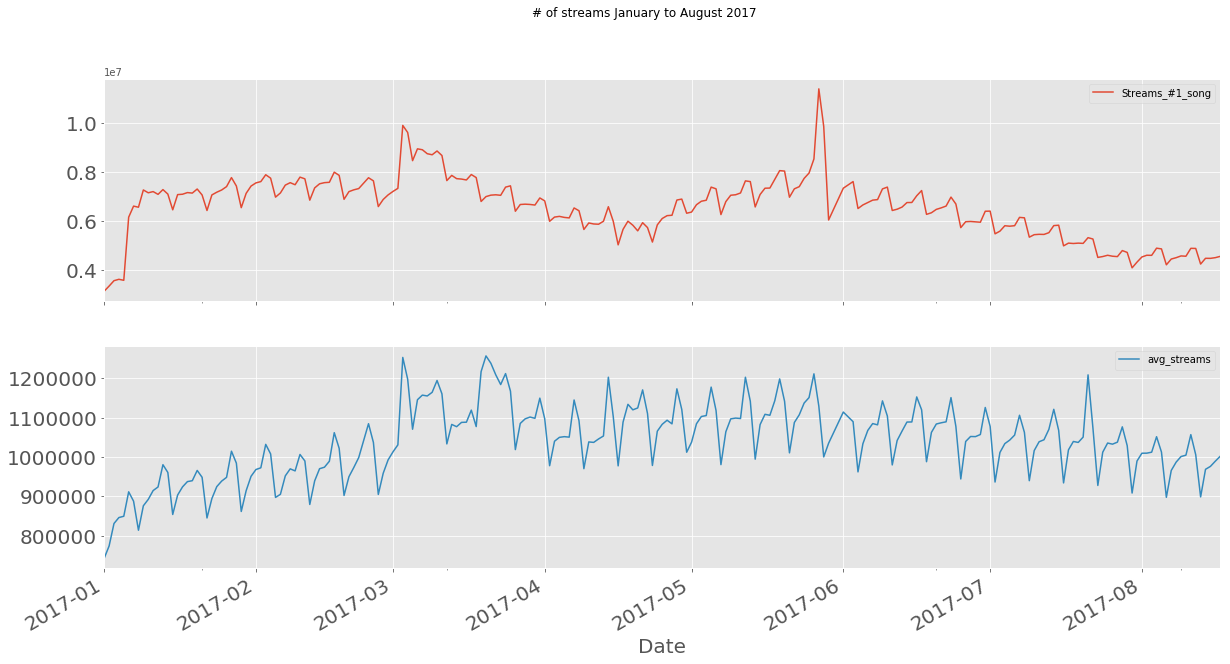

In [12]:
#Plotting streaming data
ax1, ax2 = global_streaming_data.plot(kind='line',x='Date', \
                                y=['Streams_#1_song', 'avg_streams'], figsize=(20,10),\
                                title='# of streams January to August 2017', subplots=True)
bigger_fonts(ax1)
bigger_fonts(ax2)

In [13]:
#getting streaming data for Januray
jan_data = global_streaming_data[global_streaming_data['Date'] <= '2017-02-01']
jan_data.head(10)

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470
4634,823764,2017-01-06,global,6151345,Ed Sheeran,Shape of You,4,Friday,911607.935
4635,823964,2017-01-07,global,6602494,Ed Sheeran,Shape of You,5,Saturday,887835.120
4636,824164,2017-01-08,global,6557531,Ed Sheeran,Shape of You,6,Sunday,814157.455
4637,824364,2017-01-09,global,7261007,Ed Sheeran,Shape of You,0,Monday,876179.295
4638,824564,2017-01-10,global,7145757,Ed Sheeran,Shape of You,1,Tuesday,892404.280


### Looks like # of Streams is cyclical based on Day of Week

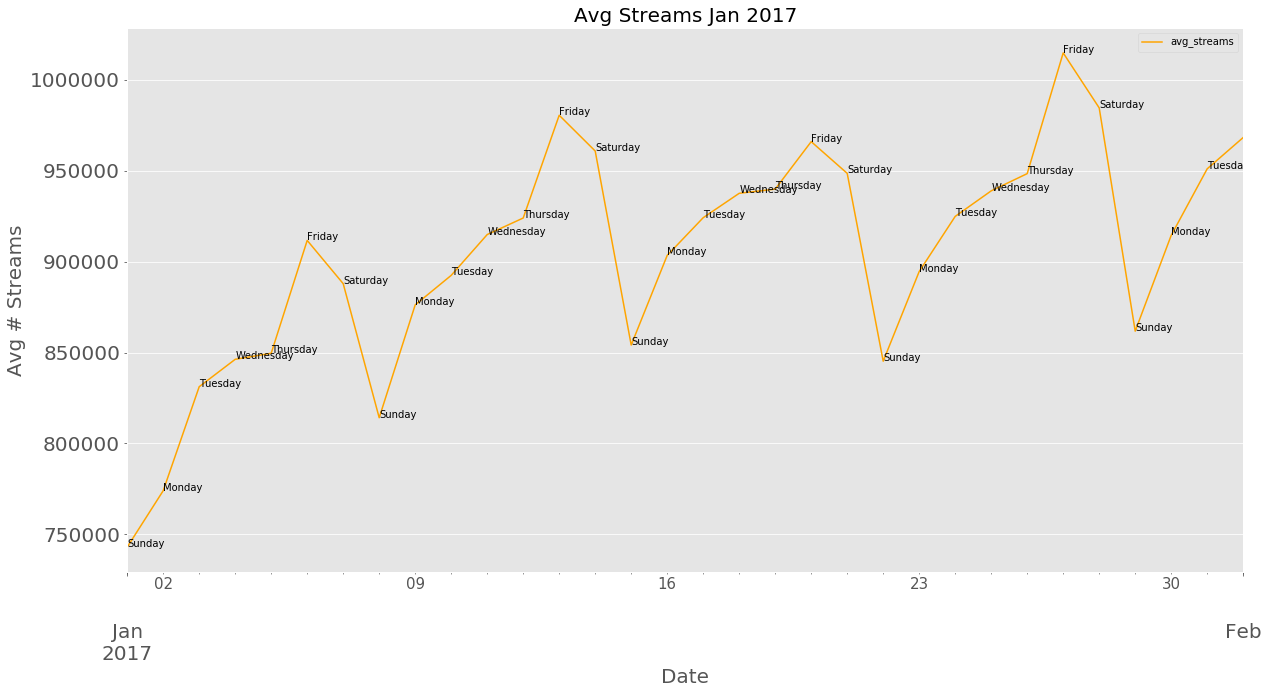

In [14]:
#plotting januray avg_streaming data
ax = jan_data.plot(kind='line',x='Date', y=['avg_streams'], \
                    figsize=(20,10), \
                    title='Avg Streams Jan 2017',\
                    color='orange', fontsize=15)
#increasing font size of plot
bigger_fonts(ax)

# Label points with day of week
date = jan_data['Date'].tolist()
avg_streams = jan_data['avg_streams'].tolist()
day = jan_data['day'].tolist()
for d, i, j in zip(day, date, avg_streams):
    ax.annotate(d, xy=(i,j),clip_on=True)
plt.ylabel('Avg # Streams')

#dataframe januray avg_streams
# global_streaming_data[['Date','avg_streams','day_of_week']]

## Streaming increases everyday of the week peaking on Friday and drops significantly on Sundays

,day_of_week,day,Streams
0,0,Monday,51114.237236
1,1,Tuesday,51762.966347
2,2,Wednesday,52362.444005
3,3,Thursday,51800.786690
4,4,Friday,55138.074701
5,5,Saturday,53917.110096
6,6,Sunday,48609.954158


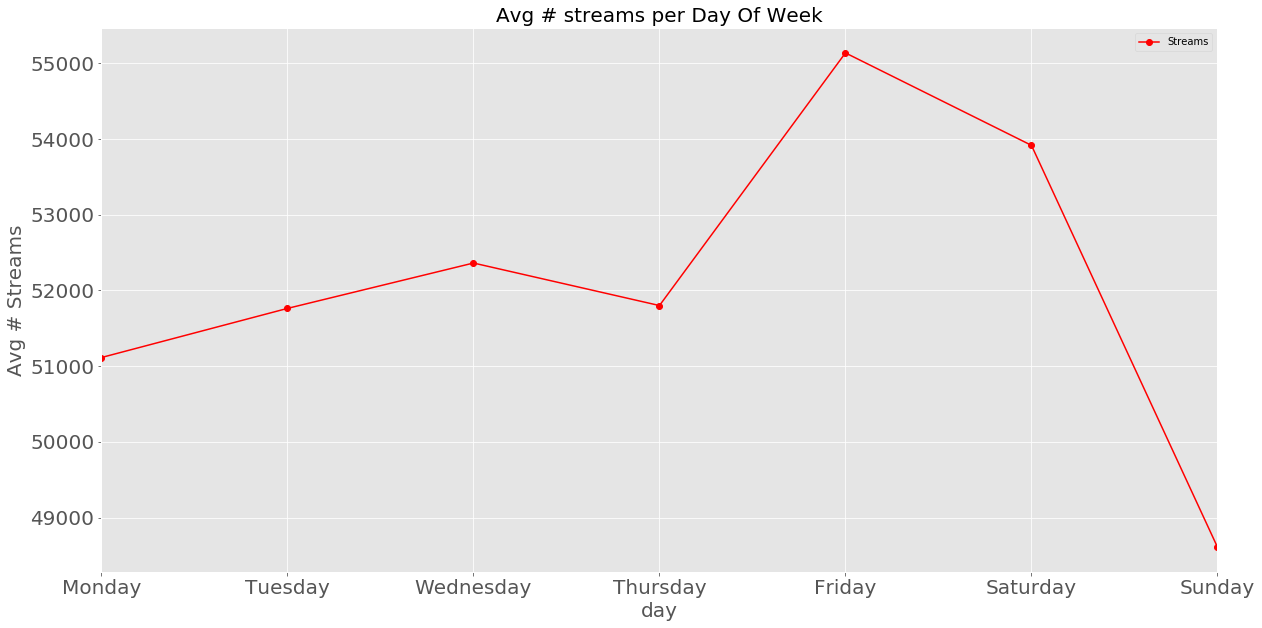

In [15]:
dow = spotify_df.groupby(['day_of_week','day']).mean()['Streams'].reset_index()

#plotting avg_streams per day of week
ax = dow.plot(x='day', y='Streams', figsize=(20,10), marker='o',title='Avg # streams per Day Of Week', color='red')
plt.ylabel('Avg # Streams')
bigger_fonts(ax)
dow

# Plotting # of Streams for #1 Song for different Regions

In [16]:
#Plotting top streams colored by #1 trackname
def plot_1_song(df, title):
    fig, ax = plt.subplots(1)
    for track in set(df['Track Name'].tolist()):
        df[df['Track Name'] == track].plot(ax=ax, x='Date', \
                                                y=['Streams_#1_song'], figsize=(20,15),\
                                                title=title,\
                                                color=np.random.rand(3,1).T)
        plt.ylabel('Total # Streams')
        plt.legend(set(df['Track Name'].tolist()))
        bigger_fonts(ax)

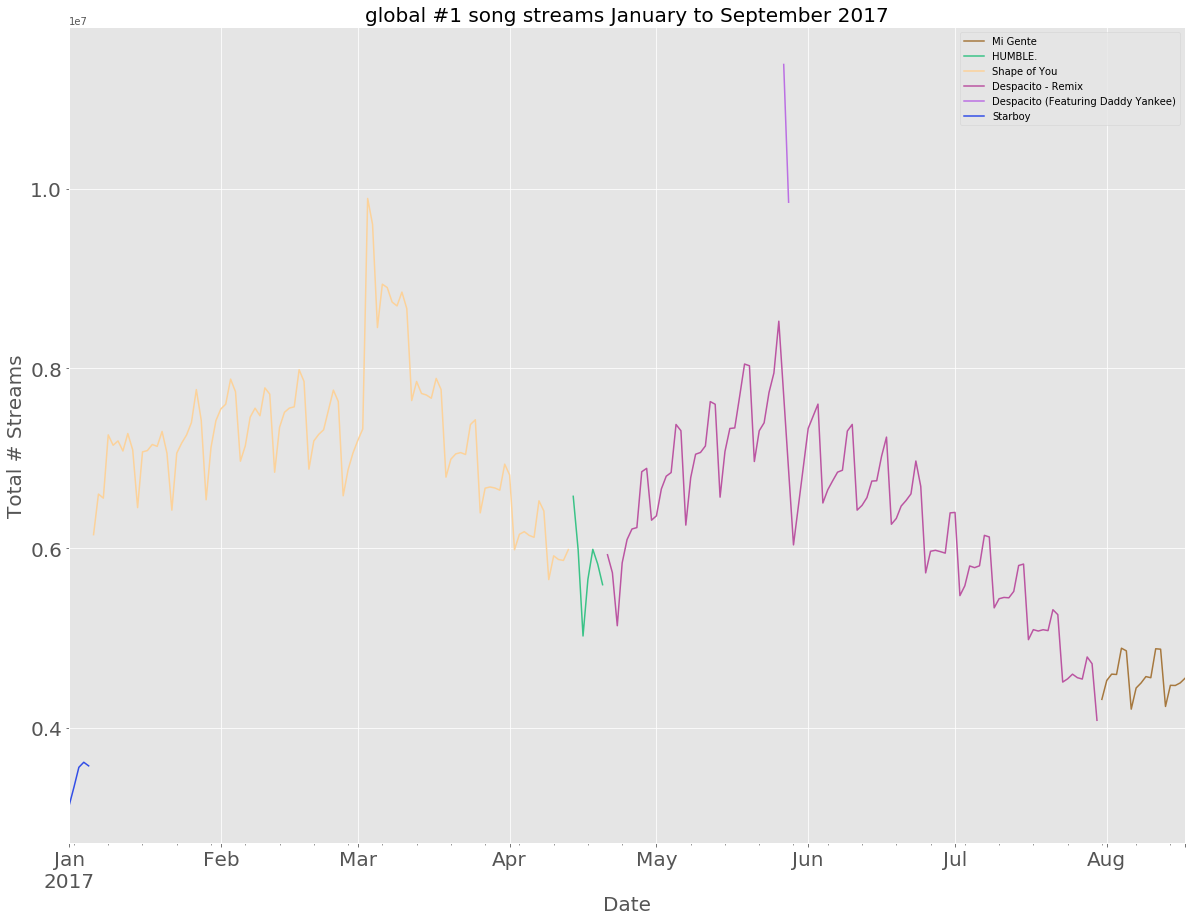

In [17]:
plot_1_song(global_streaming_data, 'global #1 song streams January to September 2017')

In [18]:
streaming_data.to_json('/Users/gmgtex/Documents/My Tableau Repository/DataSources/spotify_streaming.json')

In [19]:
def get_me_this_region(df, column_name, region_name):
    return df[df[column_name]==region_name]

In [20]:
us_data = get_me_this_region(streaming_data, 'Region', 'us')

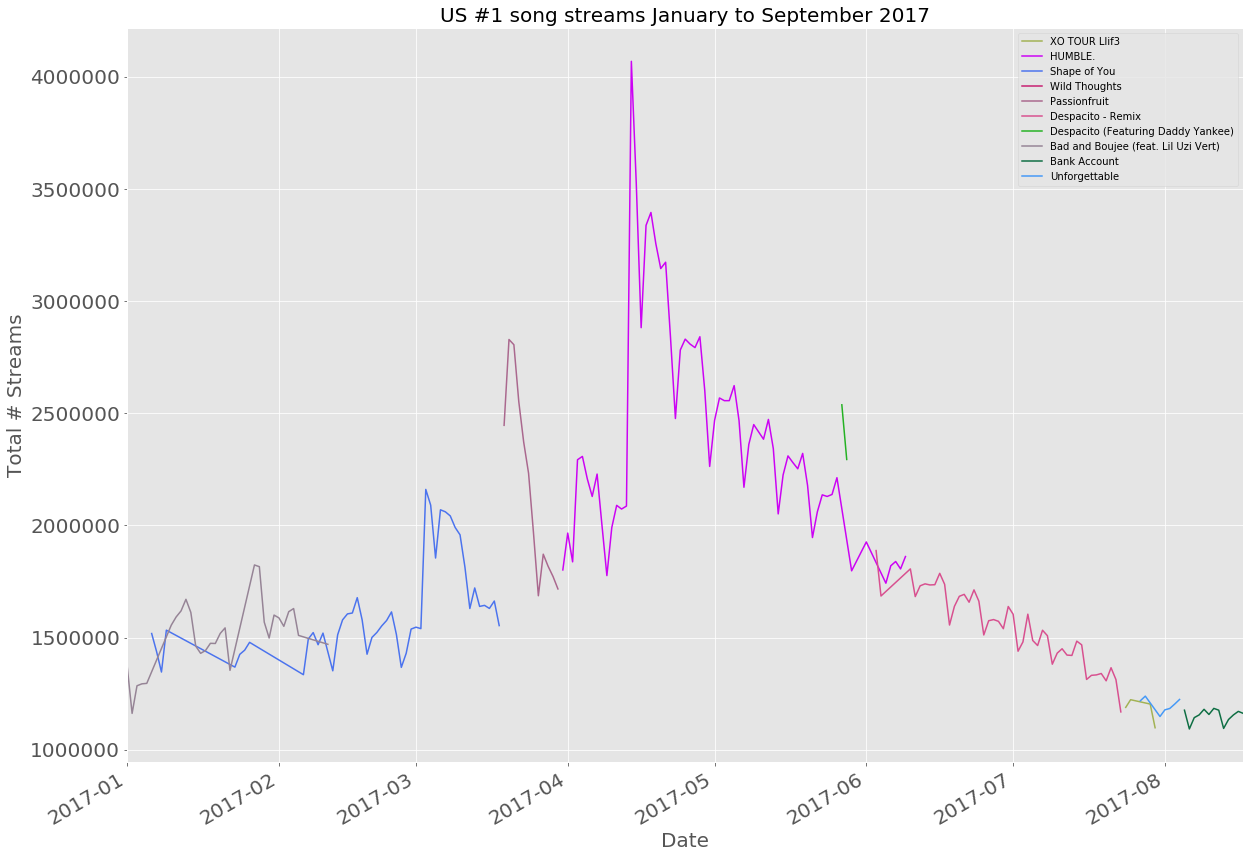

In [21]:
plot_1_song(us_data, 'US #1 song streams January to September 2017')

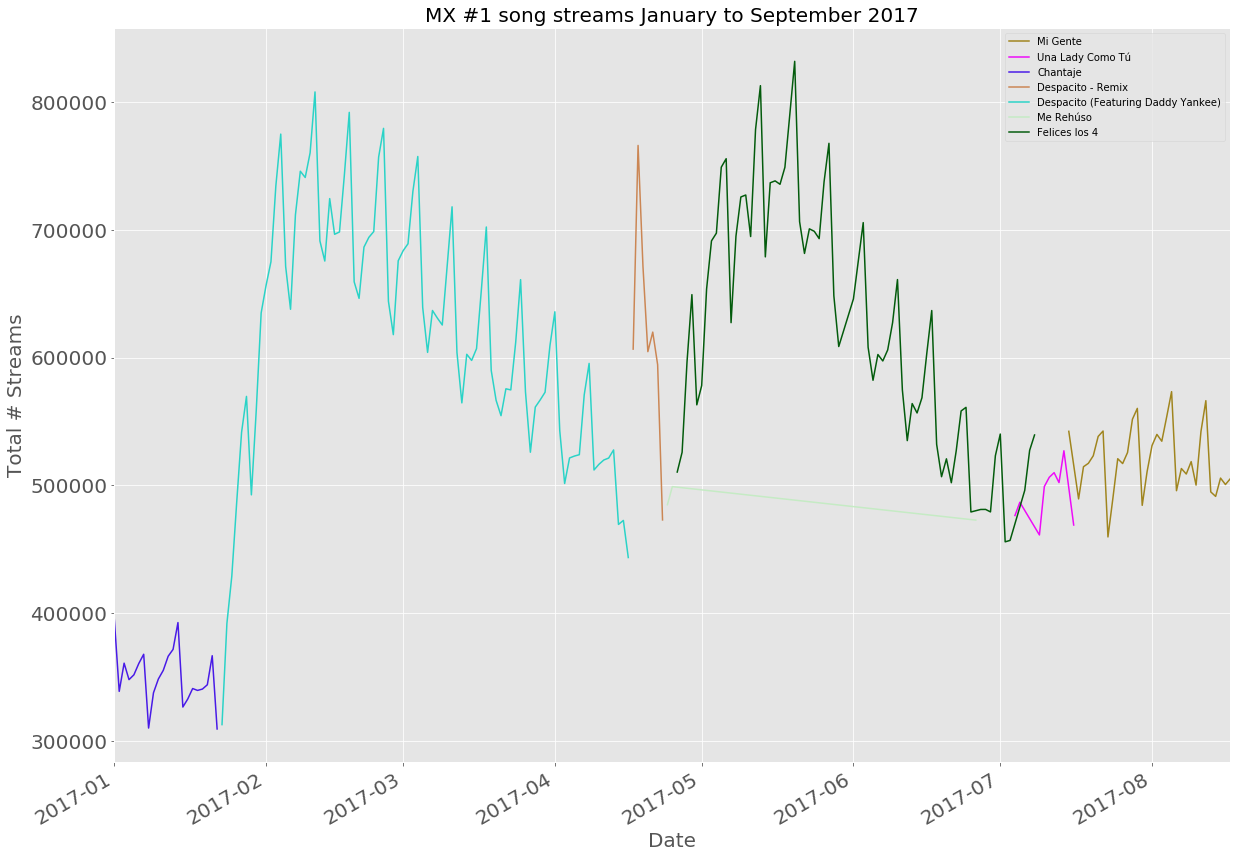

In [22]:
mx_data = get_me_this_region(streaming_data, 'Region', 'mx')
plot_1_song(mx_data, 'MX #1 song streams January to September 2017')

# Creating Stationary TimeSeries Data

In [23]:
timeseries_data = global_streaming_data.set_index('Date')
timeseries_data.head()

,index,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
Date,,,,,,,,
2017-01-01,822764,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
2017-01-02,822964,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
2017-01-03,823164,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
2017-01-04,823364,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
2017-01-05,823564,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, std=True):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig, ax = plt.subplots()
    orig = ax.plot(timeseries, color='orange',label='Original')
    mean = ax.plot(rolmean, color='black', label='Rolling Mean')
    if std:
        std = ax.plot(rolstd, color='red', label = 'Rolling Std')
    fig.set_size_inches((20,10))
    plt.xlabel('Date')
    plt.ylabel('Log Avg # Streams')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    bigger_fonts(ax)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return rolmean

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Avg Streams

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


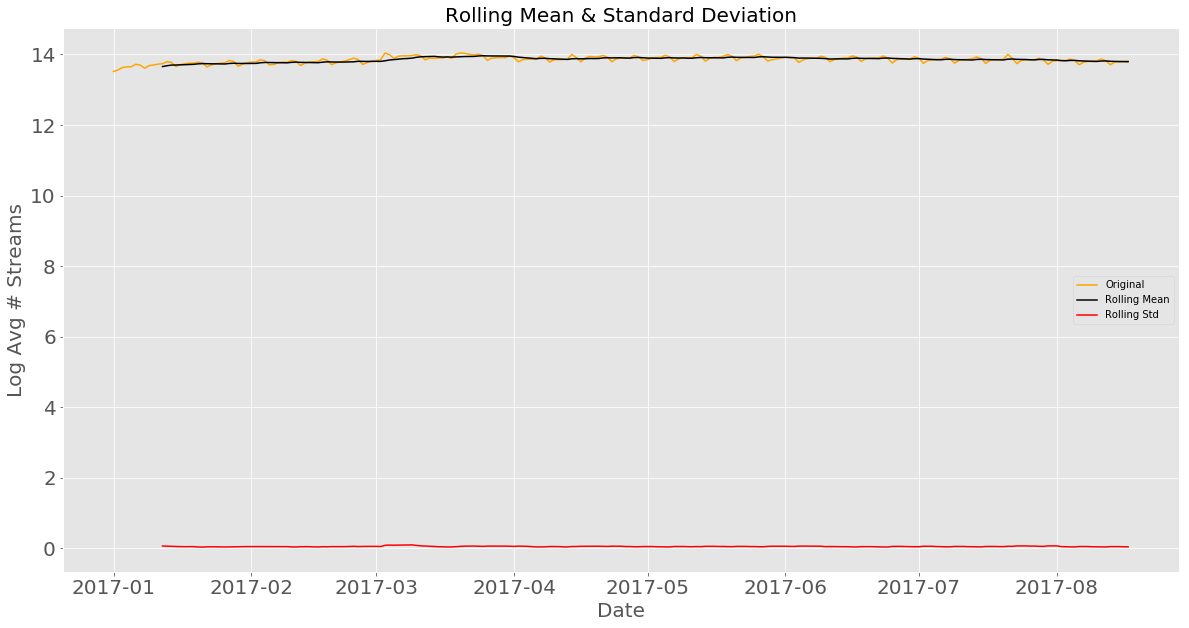

In [25]:
avg_streams_log = np.log(timeseries_data['avg_streams'])
avg_streams_rolmean = test_stationarity(avg_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


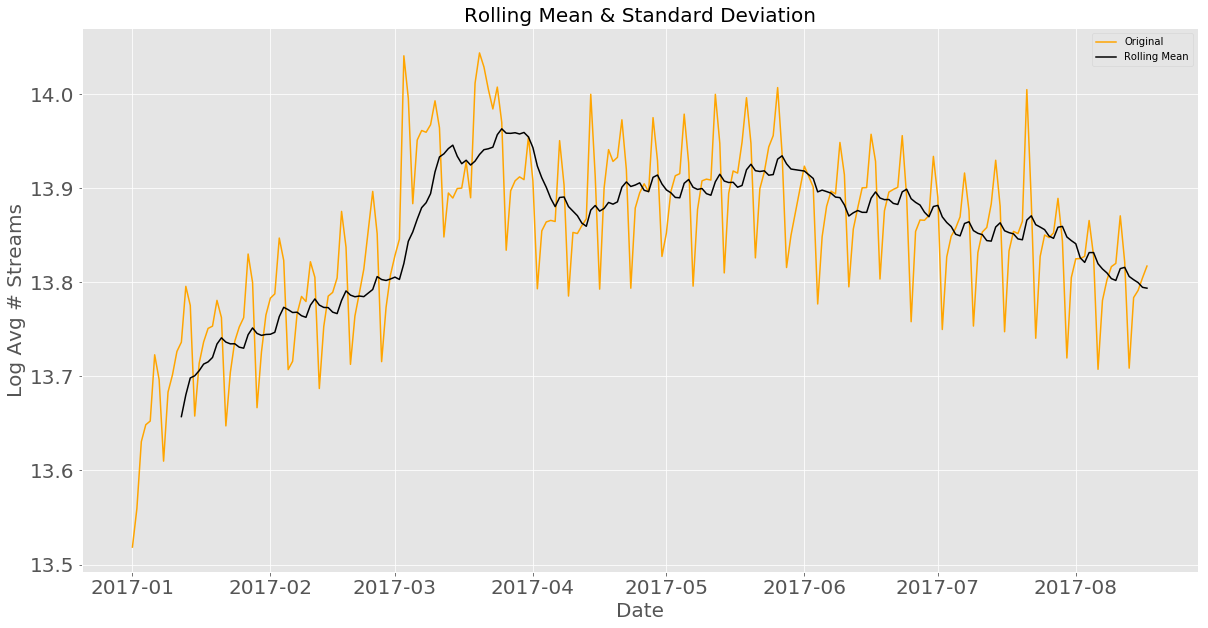

In [26]:
avg_streams_rolmean = test_stationarity(avg_streams_log, std=False)

### Time Series is not Stationary because Test Stat (-2.15) > Critical Values (10%)

In [27]:
print(avg_streams_log.iloc[12], '-', avg_streams_rolmean.iloc[12], '= avg_streams_mean_diff')
avg_streams_mean_diff = avg_streams_log - avg_streams_rolmean
avg_streams_mean_diff.head(12)

13.7957142425 - 13.6803437055 = avg_streams_mean_diff


Date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12    0.079133
Name: avg_streams, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -2.900435
p-value                          0.045297
#Lags Used                      14.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


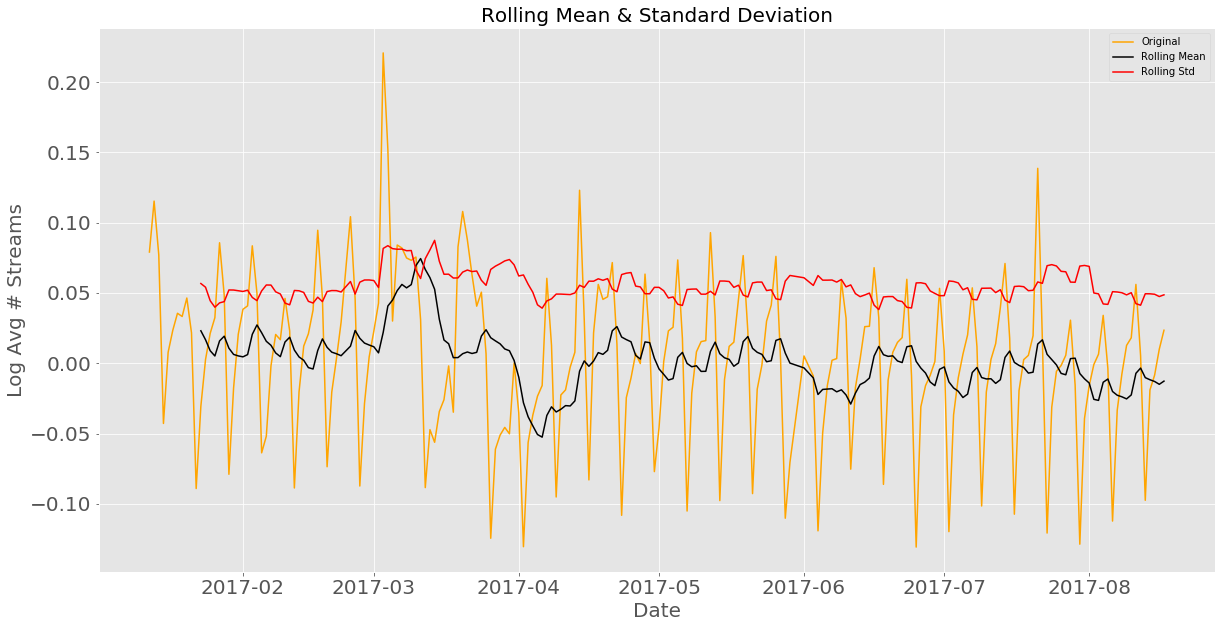

In [28]:
avg_streams_mean_diff.dropna(inplace=True)
stationary_avg_streams_rolmean = test_stationarity(avg_streams_mean_diff)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


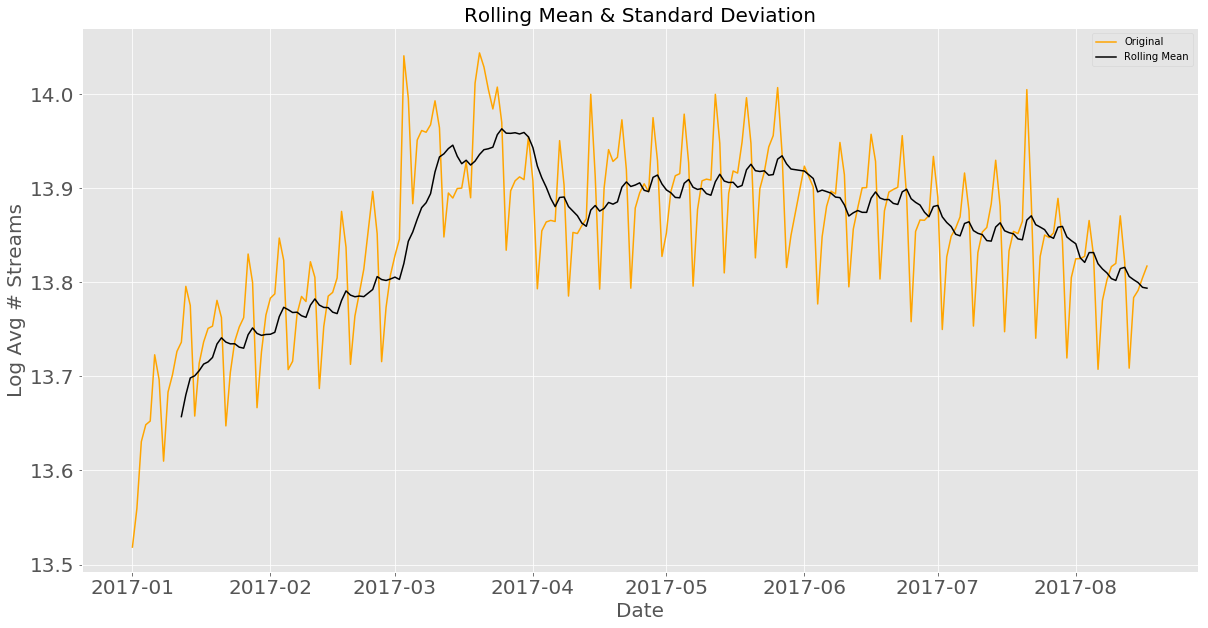

In [29]:
avg_streams_rolmean = test_stationarity(avg_streams_log, std=False)

### Time Series is Stationary with Confidence of 95% because Test Stat (-2.90) < -2.88

## #1 Song Streams

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -0.828937
p-value                          0.810474
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


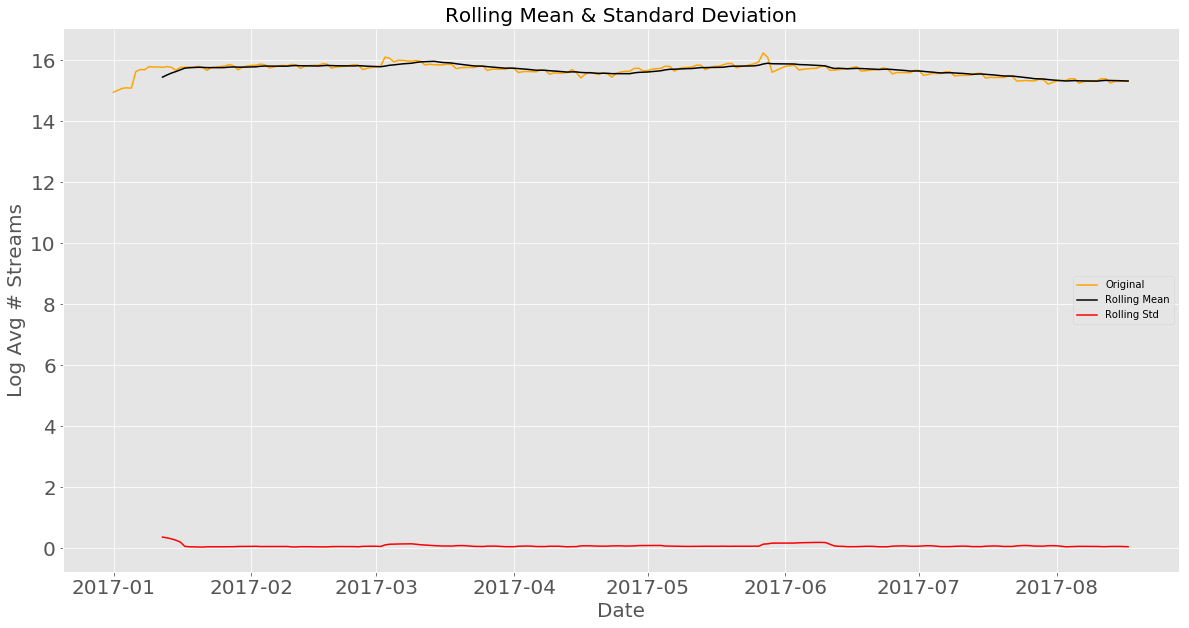

In [30]:
top_streams_log = np.log(timeseries_data['Streams_#1_song'])
top_streams_rolmean = test_stationarity(top_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -0.828937
p-value                          0.810474
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


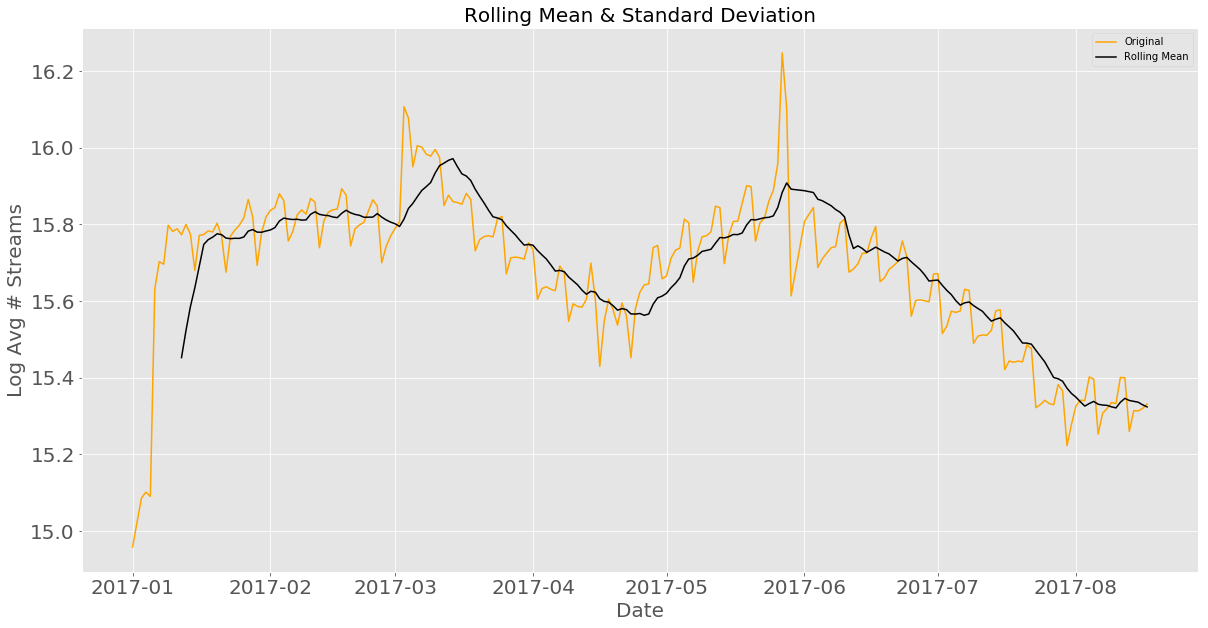

In [31]:
top_streams_rolmean = test_stationarity(top_streams_log, std=False)

### Time Series is not Stationary because Test Stat (-0.82) > Critical Values (10%)

In [32]:
print(top_streams_log.iloc[12], '-', top_streams_rolmean.iloc[12], '= top_streams_mean_diff')
top_streams_mean_diff = top_streams_log - top_streams_rolmean
top_streams_mean_diff.head(12)

15.8000843969 - 15.522836813 = top_streams_mean_diff


Date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12    0.320322
Name: Streams_#1_song, dtype: float64

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.955415
p-value                          0.039273
#Lags Used                      14.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64


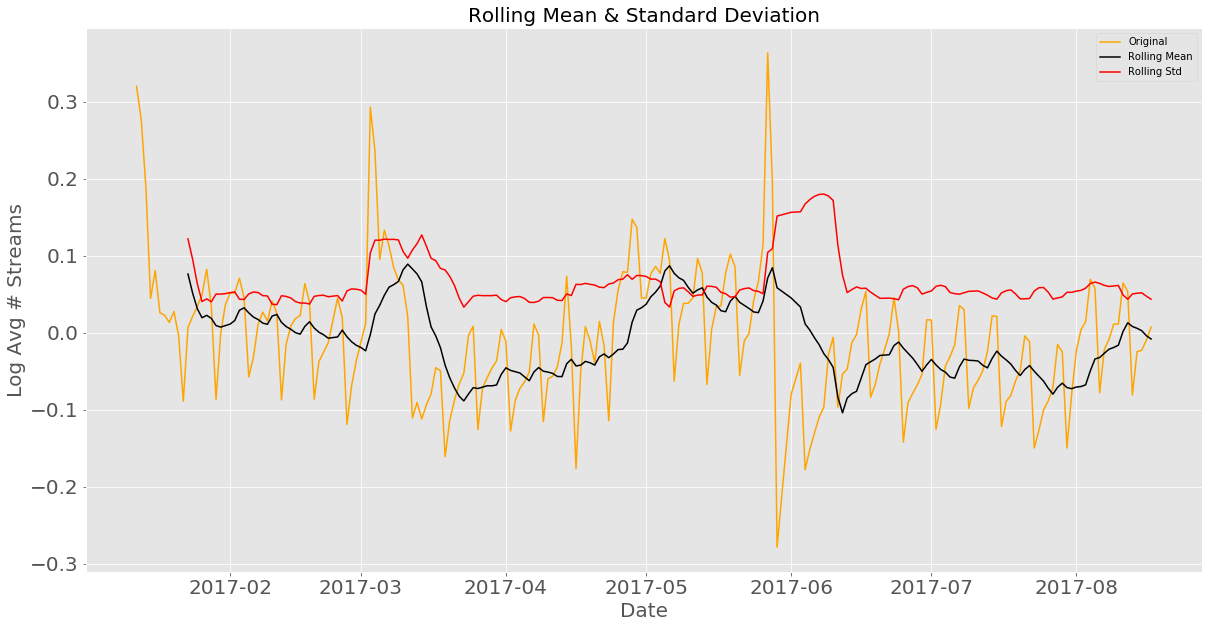

In [33]:
top_streams_mean_diff.dropna(inplace=True)
stationary_top_streams_rolmean = test_stationarity(top_streams_mean_diff)

### Time Series is Stationary with Confidence of 95% because Test Stat (-2.95) < -2.88

# Using Seasonal Decomposition to Increase Stationarness of Data

In [34]:
def seasonal_decomp(ts):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(x=ts, freq=12)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig,ax = plt.subplots(4)
    ax1,ax2,ax3,ax4 = ax

    ax1.plot(ts, label='Original', c='orange')
    ax1.legend(loc='best')

    ax2.plot(trend, label='Trend', c='blue')
    ax2.legend(loc='best')

    ax3.plot(seasonal,label='Seasonality', c='purple')
    ax3.legend(loc='best')

    ax4.plot(residual, label='Residuals',c ='red')
    ax4.legend(loc='best')

    fig.set_size_inches(30,20)
    bigger_fonts(ax1)
    bigger_fonts(ax2)
    bigger_fonts(ax3)
    bigger_fonts(ax4)
    return residual

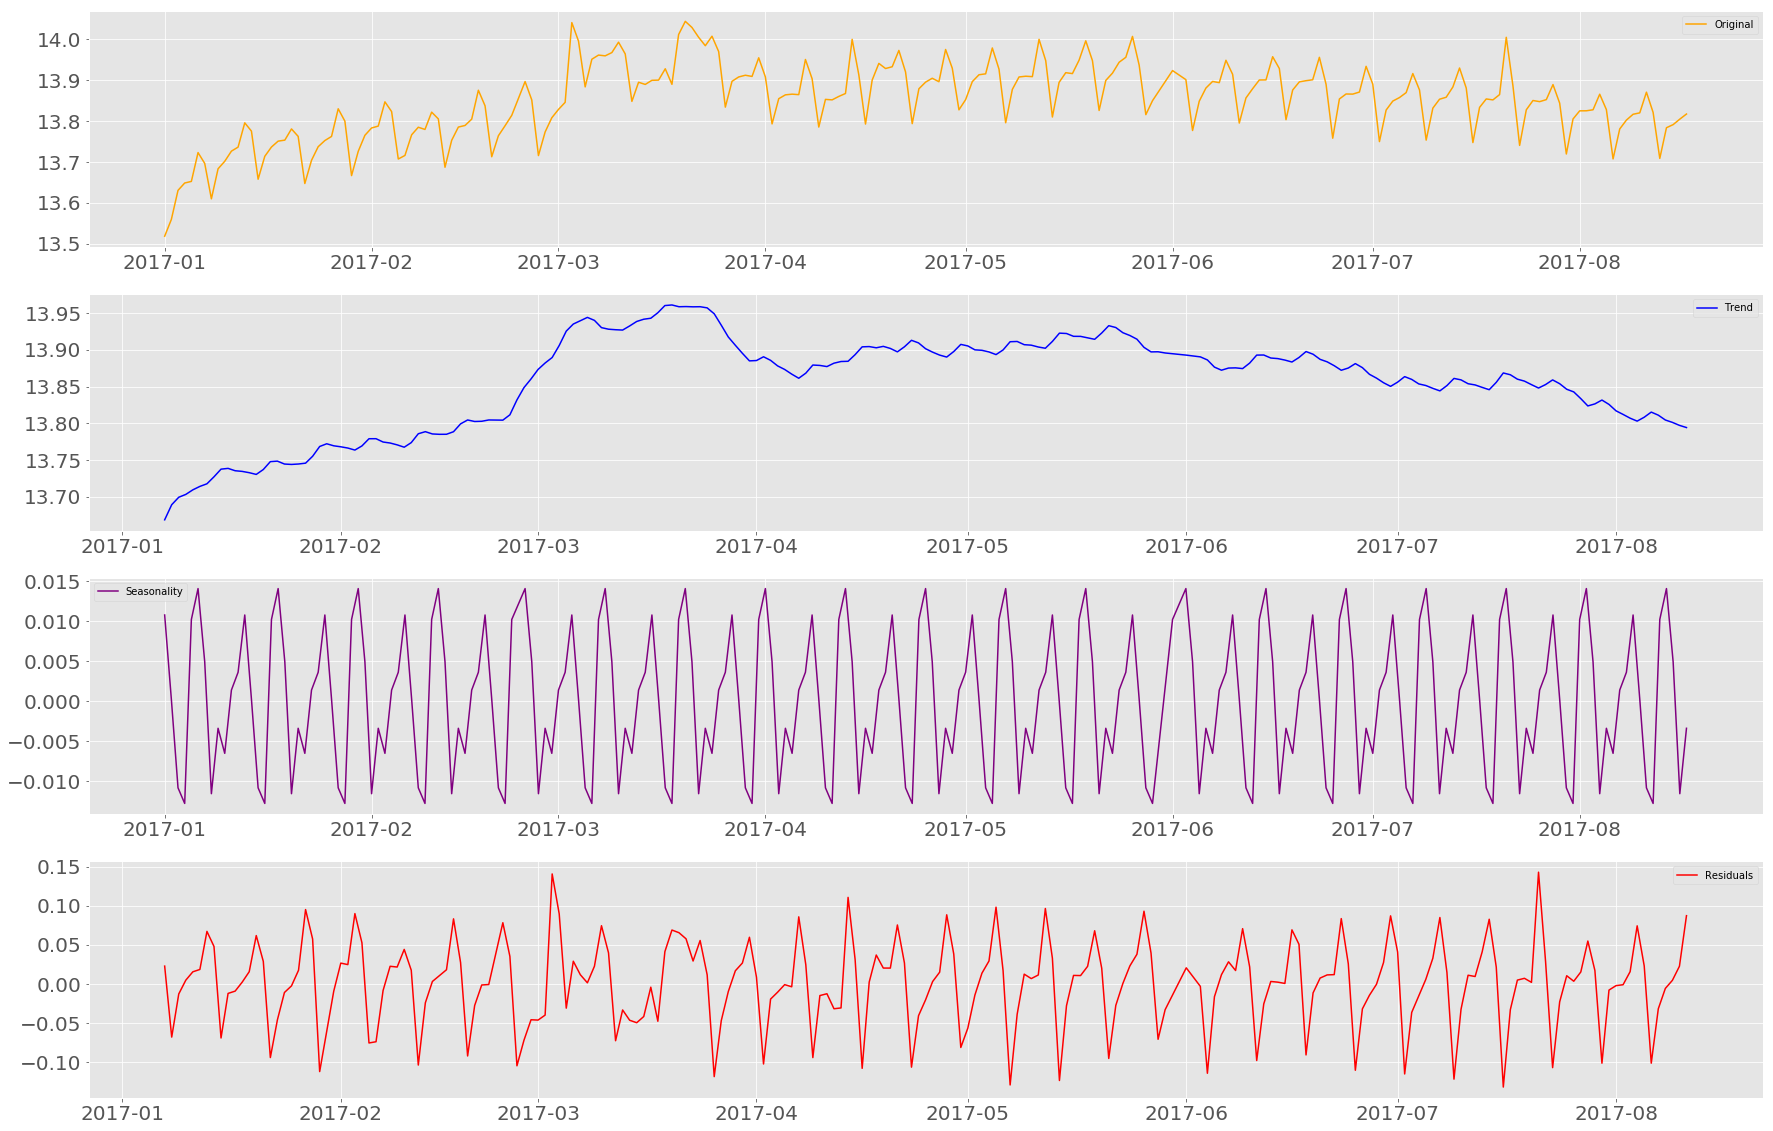

In [35]:
avg_stream_residuals = seasonal_decomp(avg_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -6.648665e+00
p-value                        5.187399e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


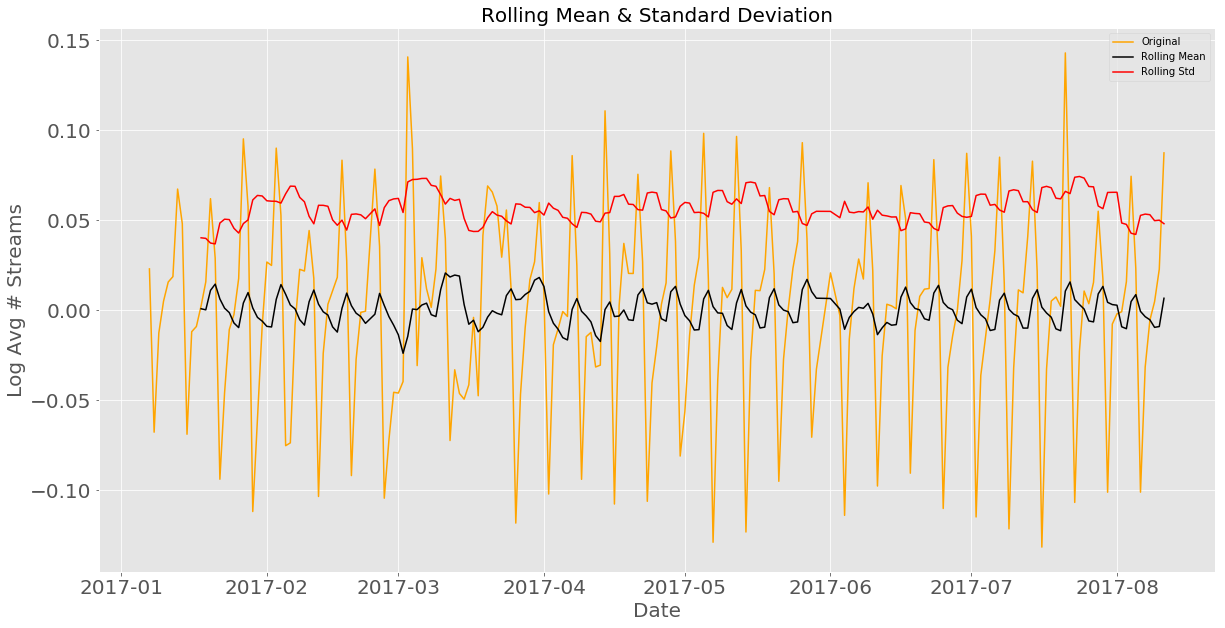

In [36]:
avg_stream_residuals.dropna(inplace=True)
x = test_stationarity(avg_stream_residuals)

### 99% Confidence TS is Stationary --> Test Stat < Critical Val at 1%

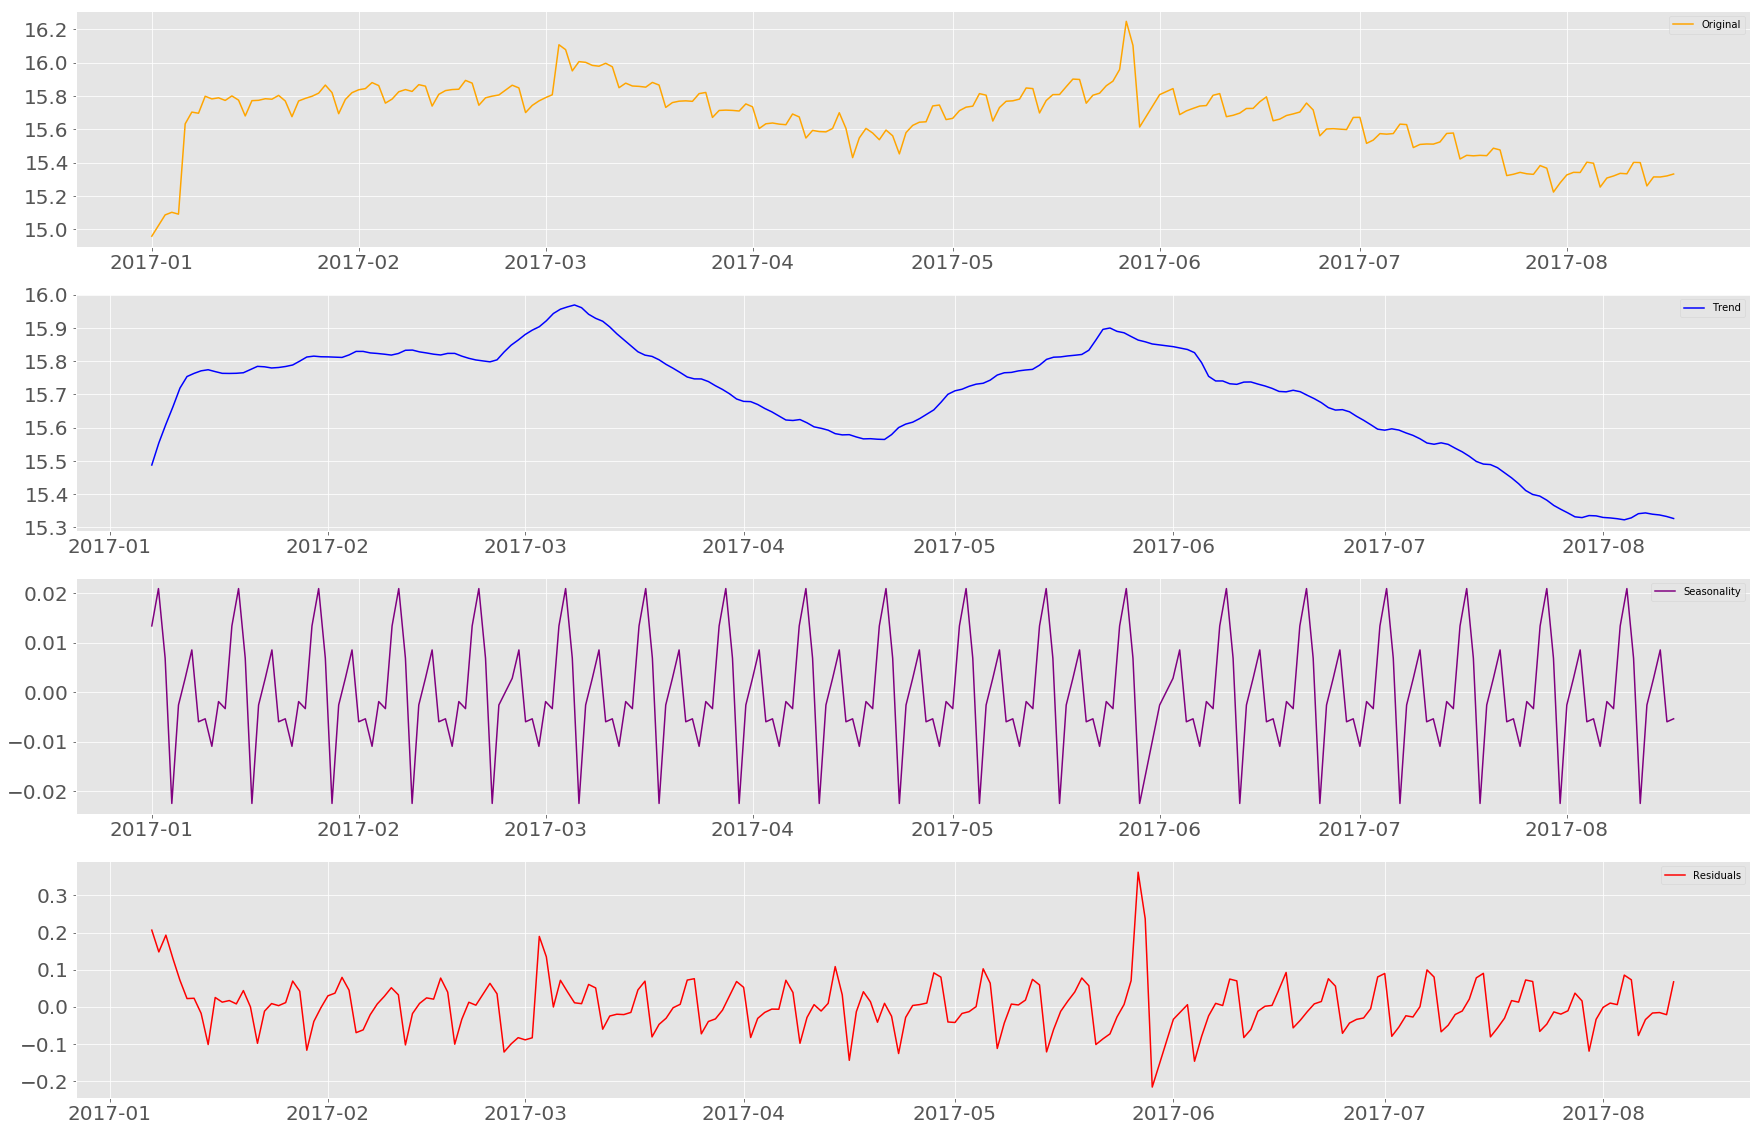

In [37]:
top_song_residuals = seasonal_decomp(top_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -5.913650e+00
p-value                        2.603312e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


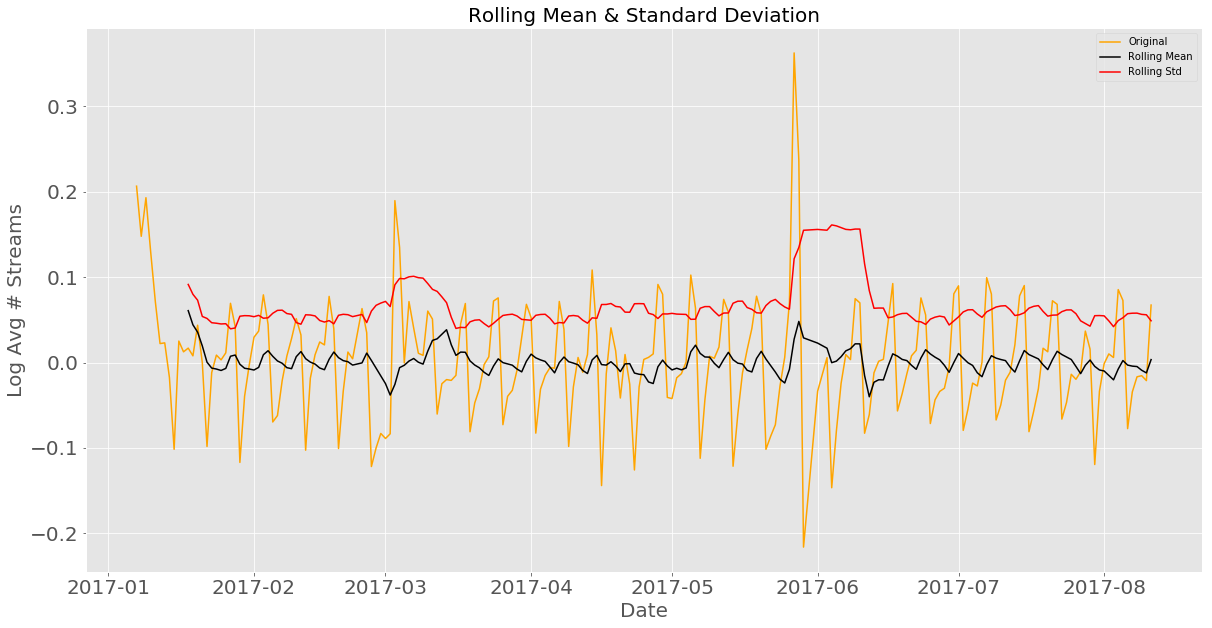

In [38]:
top_song_residuals.dropna(inplace=True)
y = test_stationarity(top_song_residuals)

### 99% Confidence TS is Stationary --> Test Stat < Critical Val at 1%

## Average Streams ARIMA model

In [39]:
from statsmodels.tsa.arima_model import ARIMA
def ARIMA_model(df, p, q):
    model = ARIMA(df, order=(p, 1, q))  
    results_ARIMA = model.fit(disp=-1)
    predictions_ARIMA = results_ARIMA.fittedvalues
    return model, predictions_ARIMA

def transforming_predictions(col_log, ARIMA_predictions):
    predictions_ARIMA_log = pd.Series(col_log.iloc[0], index=col_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(ARIMA_predictions.cumsum(),fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 0.8017093845094515


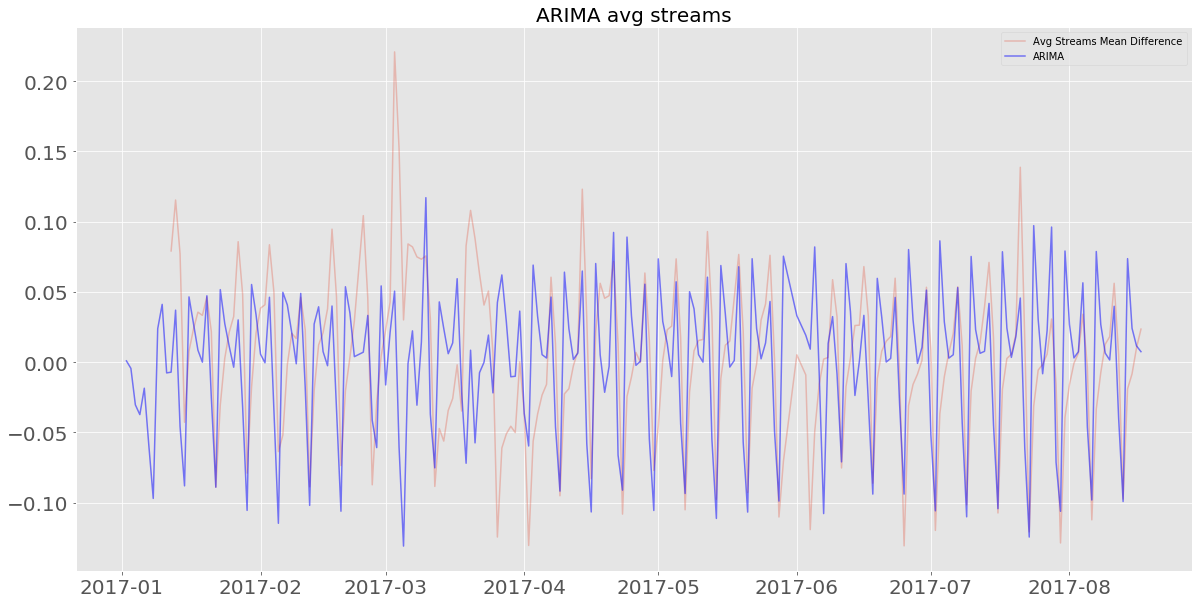

In [40]:
avg_streams_model, avg_streams_predictions_ARIMA = ARIMA_model(avg_streams_log,6,6)

fig, ax = plt.subplots(1)
ax.plot(avg_streams_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(avg_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA avg streams')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)

print('RSS: {}' .format(((avg_streams_predictions_ARIMA - avg_streams_mean_diff)**2).sum()))

In [41]:
avg_streams_predictions_ARIMA.head()

Date
2017-01-02    0.000899
2017-01-03   -0.004435
2017-01-04   -0.030393
2017-01-05   -0.037335
2017-01-06   -0.018541
dtype: float64

In [42]:
 avg_streams_predictions_ARIMA.cumsum().head(10)

Date
2017-01-02    0.000899
2017-01-03   -0.003536
2017-01-04   -0.033929
2017-01-05   -0.071263
2017-01-06   -0.089804
2017-01-07   -0.148568
2017-01-08   -0.245536
2017-01-09   -0.221728
2017-01-10   -0.180619
2017-01-11   -0.188273
dtype: float64

RMSE: 410010.25


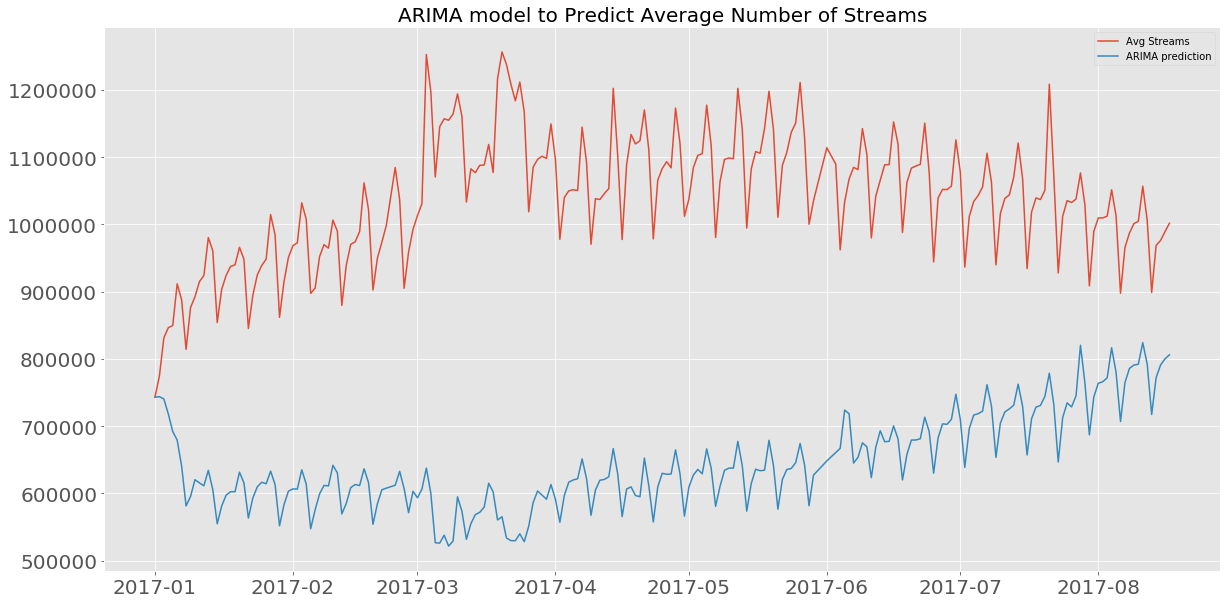

In [74]:
avg_predictions_ARIMA = transforming_predictions(avg_streams_log, avg_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(timeseries_data['avg_streams'], label='Avg Streams')
ax.plot(avg_predictions_ARIMA, label='ARIMA prediction')
plt.title('ARIMA model to Predict Average Number of Streams')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
print('RMSE: %.2f'% np.sqrt(sum((avg_predictions_ARIMA-timeseries_data['avg_streams'])**2)/len(timeseries_data['avg_streams'])))

## Top Streams ARIMA model

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 1.715742983520587


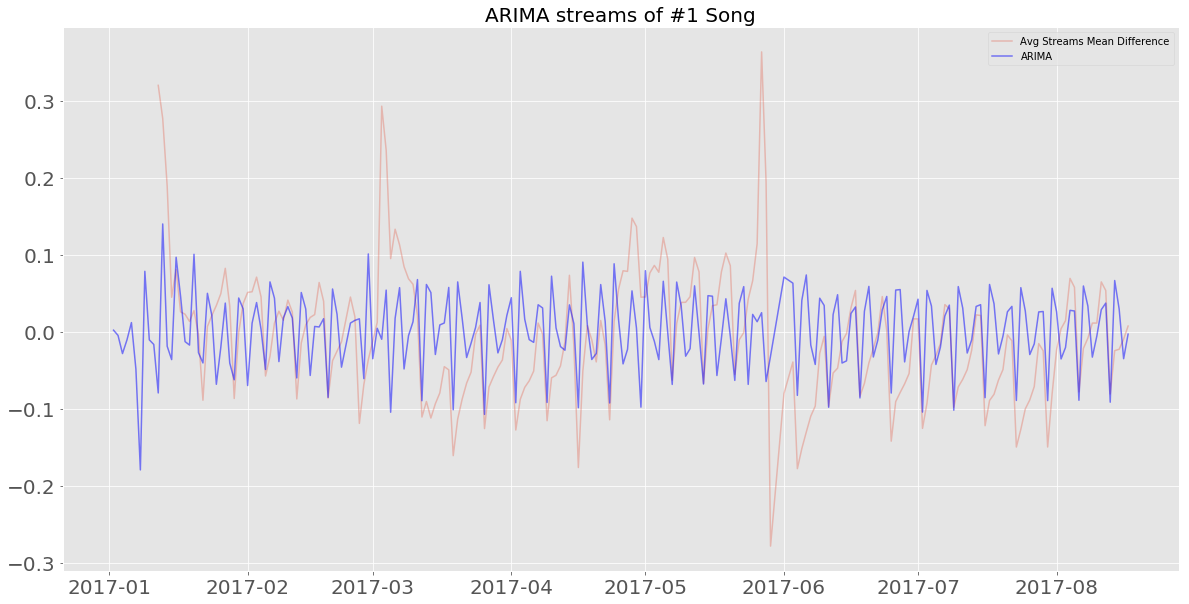

In [73]:
top_streams_model, top_streams_predictions_ARIMA = ARIMA_model(top_streams_log,6,6)

fig, ax = plt.subplots(1)
ax.plot(top_streams_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(top_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA streams of #1 Song')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)

print('RSS: {}' .format(((top_streams_predictions_ARIMA - top_streams_mean_diff)**2).sum()))

RMSE: 3378249.16


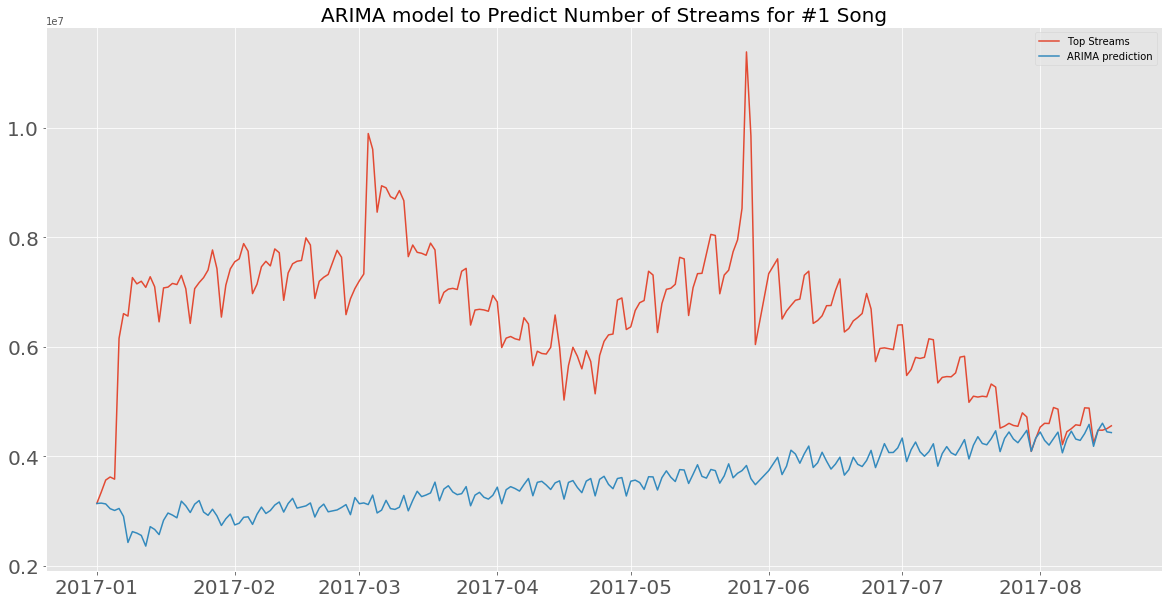

In [72]:
top_streams_predictions = transforming_predictions(top_streams_log, top_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(timeseries_data['Streams_#1_song'], label='Top Streams')
ax.plot(top_streams_predictions, label='ARIMA prediction')
plt.title('ARIMA model to Predict Number of Streams for #1 Song')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
print('RMSE: %.2f'% np.sqrt(sum((top_streams_predictions-timeseries_data['Streams_#1_song'])**2)/len(timeseries_data['Streams_#1_song'])))

## Total Streams

In [61]:
spotify_global_df = spotify_df[spotify_df['Region']=='global']

In [62]:
spotify_total_streams = spotify_global_df.groupby('Date').sum()['Streams'].reset_index()
spotify_total_streams.set_index('Date', inplace=True)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


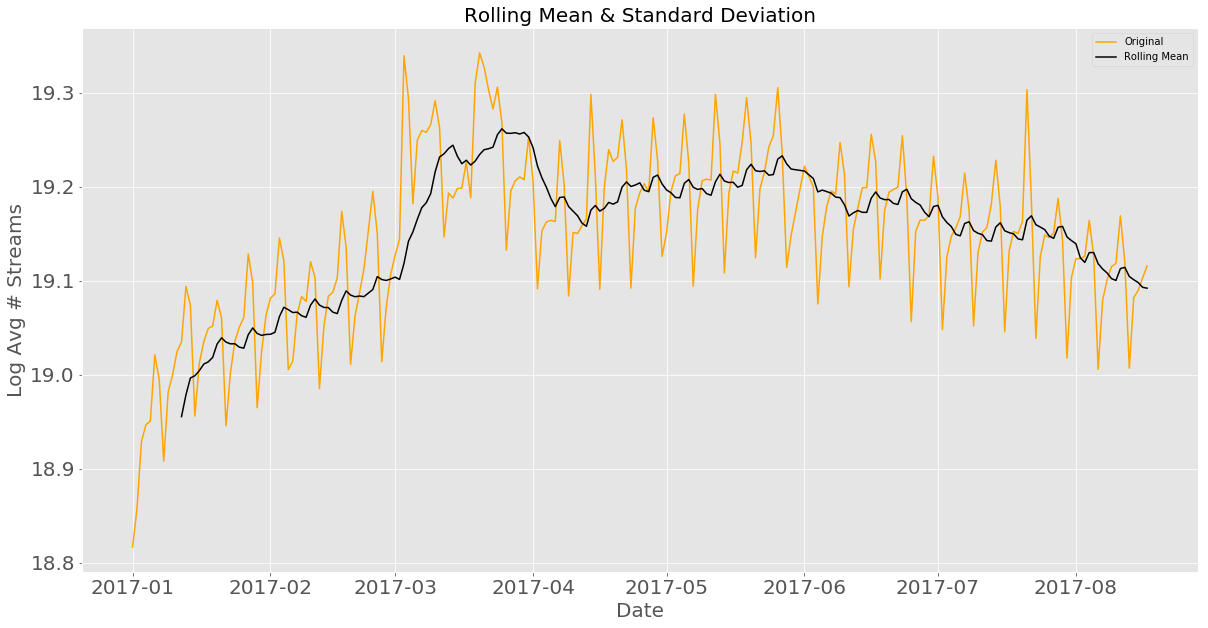

In [63]:
spotify_total_streams_log = np.log(spotify_total_streams['Streams'])
spotify_total_streams_rolmean = test_stationarity(spotify_total_streams_log, std=False)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.900435
p-value                          0.045297
#Lags Used                      14.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64


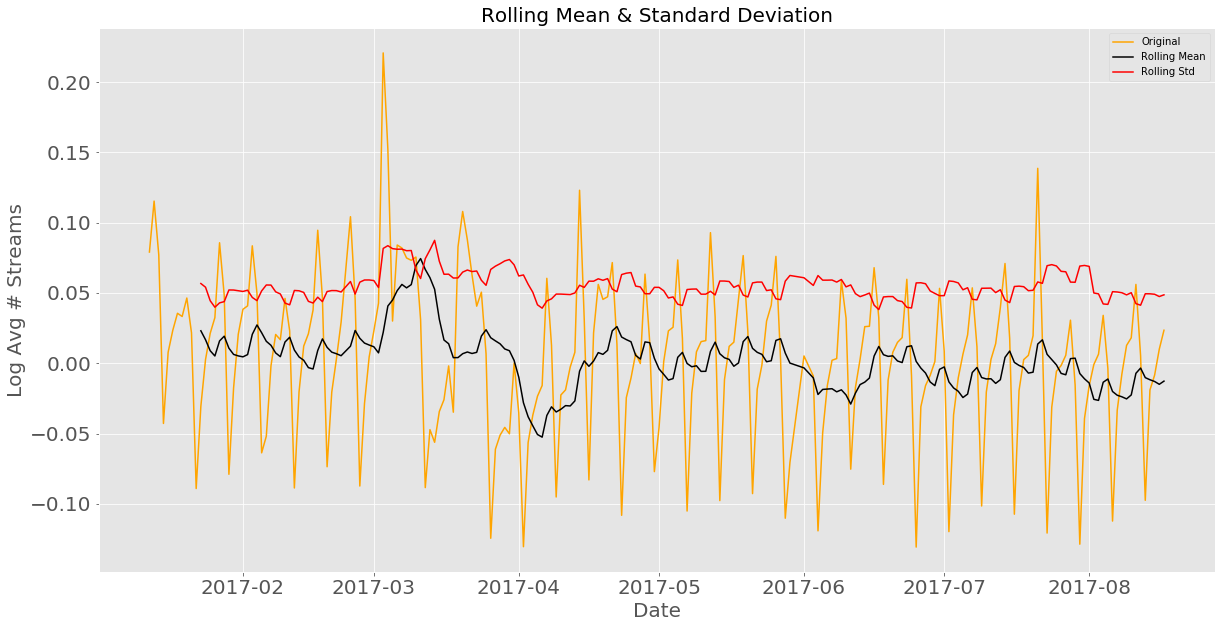

In [65]:
spotify_total_streams_log_mean_diff = spotify_total_streams_log - spotify_total_streams_rolmean
spotify_total_streams_log_mean_diff.dropna(inplace=True)
spotify_total_streams_rolmean = test_stationarity(spotify_total_streams_log_mean_diff)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 0.803270300938142


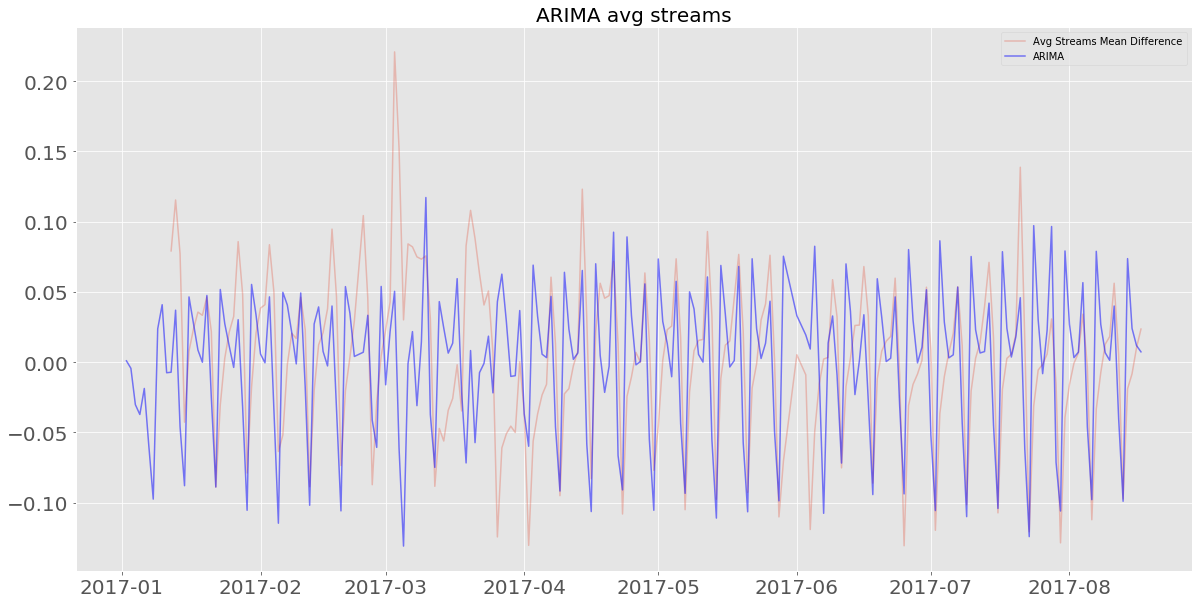

In [67]:
total_streams_model, total_streams_predictions_ARIMA = ARIMA_model(spotify_total_streams_log,6,6)

fig, ax = plt.subplots(1)
ax.plot(spotify_total_streams_log_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(total_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA total number of streams')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)

print('RSS: {}' .format(((total_streams_predictions_ARIMA - spotify_total_streams_log_mean_diff)**2).sum()))

RMSE: 82463755.04


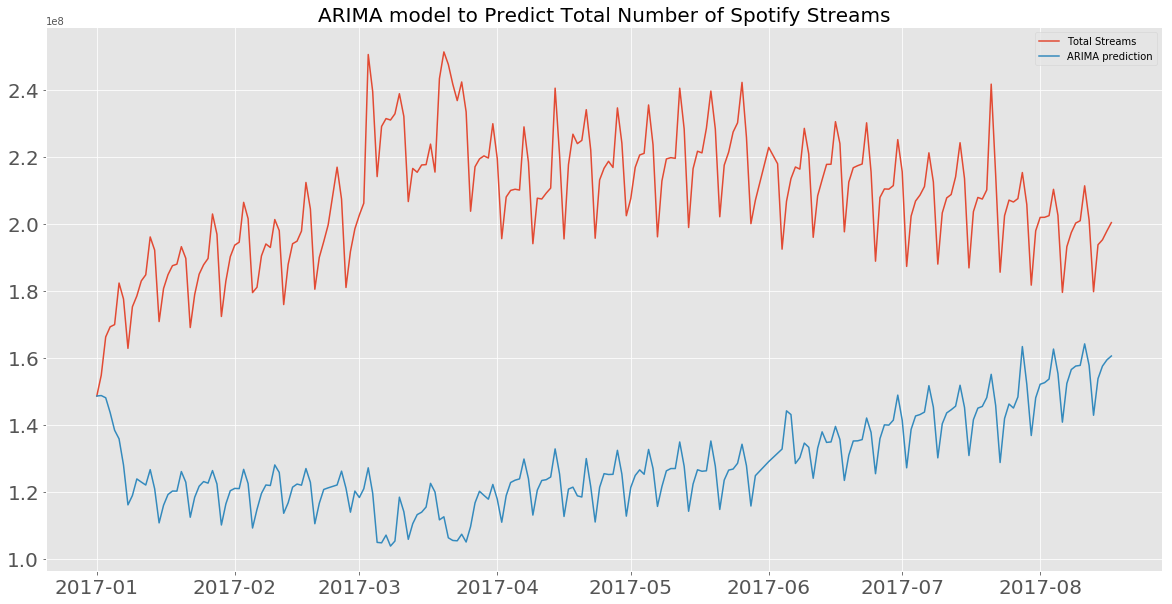

In [76]:
total_streams_predictions = transforming_predictions(spotify_total_streams_log, total_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(spotify_total_streams['Streams'], label='Total Streams')
ax.plot(total_streams_predictions, label='ARIMA prediction')
plt.title('ARIMA model to Predict Total Number of Spotify Streams')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
print('RMSE: %.2f'% np.sqrt(sum((total_streams_predictions-spotify_total_streams['Streams'])**2)/len(spotify_total_streams['Streams'])))

